In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['Family'] = df['SibSp'] + df['Parch']

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Family       891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


/var/folders/32/dhq7gf0n5yq0162cwcsynrtm0000gn/T/ipykernel_20448/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

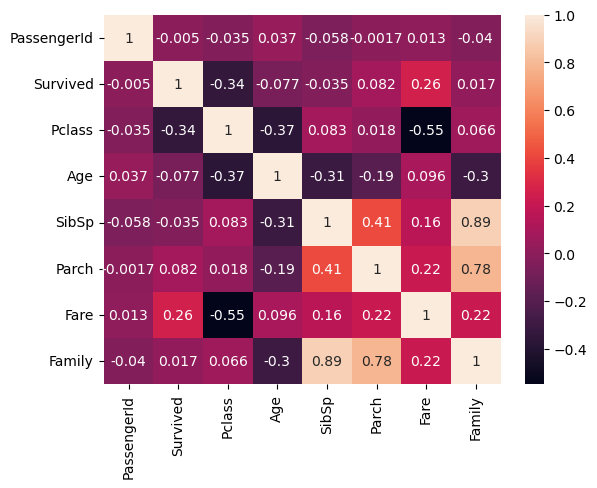

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [9]:
df['Age'] = imputer.fit_transform(X=np.array(df['Age']).reshape(-1,1))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Family       891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [12]:
df = df.drop(['PassengerId','Name','Ticket','Cabin','SibSp','Parch'],axis=1)

In [13]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  889 non-null    object 
 6   Family    891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [15]:
df = df.dropna()

In [16]:
ohe_sex = OneHotEncoder(sparse_output=False)
ohe_emb = OneHotEncoder(sparse_output=False)

In [17]:
sex = ohe_sex.fit_transform(np.array(df['Sex']).reshape(-1,1))
embarked = ohe_emb.fit_transform(np.array(df['Embarked']).reshape(-1,1))

In [18]:
print(ohe_sex.categories_)
print(ohe_emb.categories_)

[array(['female', 'male'], dtype=object)]
[array(['C', 'Q', 'S'], dtype=object)]


In [19]:
sex = pd.DataFrame(data=sex,columns=['Female','Male'],dtype=int)
embarked = pd.DataFrame(data=embarked,columns=['C','Q','S'],dtype=int)

In [20]:
df1 = pd.concat([sex,embarked],axis=1)

In [21]:
df1.head()

,Female,Male,C,Q,S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [22]:
df = pd.concat([df,df1],axis=1)

In [23]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Female,Male,C,Q,S
0,0.0,3.0,male,22.0,7.2500,S,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,female,38.0,71.2833,C,1.0,1.0,0.0,1.0,0.0,0.0
2,1.0,3.0,female,26.0,7.9250,S,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,female,35.0,53.1000,S,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,3.0,male,35.0,8.0500,S,0.0,0.0,1.0,0.0,0.0,1.0


In [24]:
df = df.drop(['Sex','Embarked'],axis=1)

In [25]:
df.head()

,Survived,Pclass,Age,Fare,Family,Female,Male,C,Q,S
0,0.0,3.0,22.0,7.2500,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,38.0,71.2833,1.0,1.0,0.0,1.0,0.0,0.0
2,1.0,3.0,26.0,7.9250,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,35.0,53.1000,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,3.0,35.0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0


In [26]:
df.corr()

,Survived,Pclass,Age,Fare,Family,Female,Male,C,Q,S
Survived,1.000000,-0.335549,-0.069822,0.255290,0.018277,0.023116,-0.023116,0.010614,0.037671,-0.033024
Pclass,-0.335549,1.000000,-0.336512,-0.548193,0.064221,-0.032381,0.032381,-0.080982,0.033399,0.049936
Age,-0.069822,-0.336512,1.000000,0.093707,-0.244631,0.003035,-0.003035,0.029036,0.017932,-0.036737
Fare,0.255290,-0.548193,0.093707,1.000000,0.218658,0.024440,-0.024440,0.053277,-0.021442,-0.033187
Family,0.018277,0.064221,-0.244631,0.218658,1.000000,-0.041675,0.041675,0.004172,-0.086697,0.050938
Female,0.023116,-0.032381,0.003035,0.024440,-0.041675,1.000000,-1.000000,0.084520,0.075217,-0.121405
Male,-0.023116,0.032381,-0.003035,-0.024440,0.041675,-1.000000,1.000000,-0.084520,-0.075217,0.121405
C,0.010614,-0.080982,0.029036,0.053277,0.004172,0.084520,-0.084520,1.000000,-0.148646,-0.782613
Q,0.037671,0.033399,0.017932,-0.021442,-0.086697,0.075217,-0.075217,-0.148646,1.000000,-0.499261
S,-0.033024,0.049936,-0.036737,-0.033187,0.050938,-0.121405,0.121405,-0.782613,-0.499261,1.000000


In [27]:
scaler_age = StandardScaler()
scaler_fare = StandardScaler()

df['Age'] = scaler_age.fit_transform(np.array(df['Age']).reshape(-1,1))
df['Fare'] = scaler_fare.fit_transform(np.array(df['Fare']).reshape(-1,1))

In [28]:
df.head()

,Survived,Pclass,Age,Fare,Family,Female,Male,C,Q,S
0,0.0,3.0,-0.563674,-0.500240,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,0.669217,0.788947,1.0,1.0,0.0,1.0,0.0,0.0
2,1.0,3.0,-0.255451,-0.486650,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.438050,0.422861,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,3.0,0.438050,-0.484133,0.0,0.0,1.0,0.0,0.0,1.0


array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Family'}>,
        <Axes: title={'center': 'Female'}>],
       [<Axes: title={'center': 'Male'}>, <Axes: title={'center': 'C'}>,
        <Axes: title={'center': 'Q'}>],
       [<Axes: title={'center': 'S'}>, <Axes: >, <Axes: >]], dtype=object)

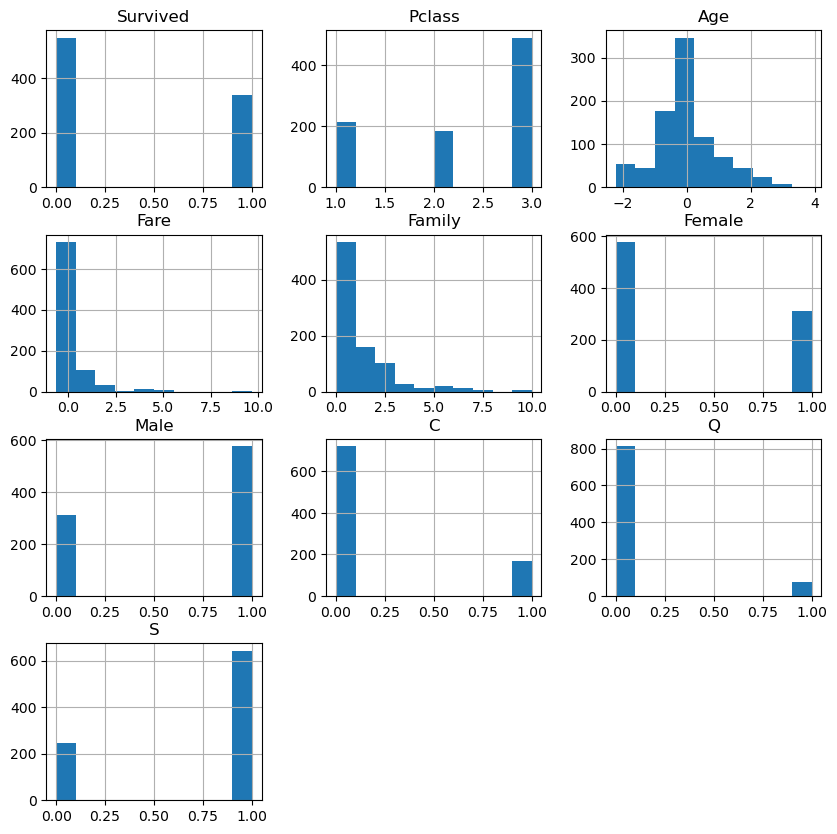

In [29]:
df.hist(figsize=(10,10),bins=10)

In [30]:
df.head()

,Survived,Pclass,Age,Fare,Family,Female,Male,C,Q,S
0,0.0,3.0,-0.563674,-0.500240,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,0.669217,0.788947,1.0,1.0,0.0,1.0,0.0,0.0
2,1.0,3.0,-0.255451,-0.486650,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.438050,0.422861,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,3.0,0.438050,-0.484133,0.0,0.0,1.0,0.0,0.0,1.0


In [31]:
df.isna().sum()

Survived    2
Pclass      2
Age         2
Fare        2
Family      2
Female      2
Male        2
C           2
Q           2
S           2
dtype: int64

In [32]:
df = df.dropna()

In [33]:
df.isna().sum()

Survived    0
Pclass      0
Age         0
Fare        0
Family      0
Female      0
Male        0
C           0
Q           0
S           0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 888
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    float64
 1   Pclass    887 non-null    float64
 2   Age       887 non-null    float64
 3   Fare      887 non-null    float64
 4   Family    887 non-null    float64
 5   Female    887 non-null    float64
 6   Male      887 non-null    float64
 7   C         887 non-null    float64
 8   Q         887 non-null    float64
 9   S         887 non-null    float64
dtypes: float64(10)
memory usage: 76.2 KB


In [35]:
df['Survived'].value_counts()

0.0    548
1.0    339
Name: Survived, dtype: int64

In [36]:
X = df.drop('Survived',axis=1)
y = df['Survived']

train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=1234,stratify=y)

In [37]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 880 to 66
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  267 non-null    float64
 1   Age     267 non-null    float64
 2   Fare    267 non-null    float64
 3   Family  267 non-null    float64
 4   Female  267 non-null    float64
 5   Male    267 non-null    float64
 6   C       267 non-null    float64
 7   Q       267 non-null    float64
 8   S       267 non-null    float64
dtypes: float64(9)
memory usage: 20.9 KB


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn import metrics

In [39]:
clf1 = LogisticRegression(max_iter=150)
clf2 = GaussianNB()
clf3 = KNeighborsClassifier(n_neighbors=5)
clf4 = RandomForestClassifier(n_estimators=200)
clf5 = DecisionTreeClassifier()
clf6 = SVC(kernel='rbf')

In [40]:
estimators = [clf1,clf2,clf3,clf4,clf5,clf6]

trained_model = []
accuracy = []

for estimator in estimators:
    model = estimator.fit(train_x,train_y)
    trained_model.append(model)
    y_pred = model.predict(test_x)
    accuracy.append(metrics.accuracy_score(test_y,y_pred))

In [41]:
accuracy

[0.6779026217228464,
 0.6629213483146067,
 0.6816479400749064,
 0.6741573033707865,
 0.6367041198501873,
 0.704119850187266]

In [42]:
import tensorflow
import keras
from keras import layers, Sequential

In [43]:
net = Sequential([
    keras.layers.Input(shape=(9,)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-05-26 17:42:56.474838: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-26 17:42:56.475287: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [44]:
net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                500       
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


In [45]:
net.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
net.fit(x=train_x,y=train_y,epochs=10,validation_split=0.2)

Epoch 1/10


2023-05-26 17:42:56.957192: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-26 17:42:57.145710: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 2s 20ms/step - loss: 0.6518 - accuracy: 0.6230 - val_loss: 0.6464 - val_accuracy: 0.6048
Epoch 2/10
10/16 [=================>............] - ETA: 0s - loss: 0.6364 - accuracy: 0.6313

2023-05-26 17:42:58.410507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 7ms/step - loss: 0.6231 - accuracy: 0.6472 - val_loss: 0.6425 - val_accuracy: 0.5968
Epoch 3/10
16/16 [==============================] - 0s 8ms/step - loss: 0.6145 - accuracy: 0.6673 - val_loss: 0.6360 - val_accuracy: 0.5968
Epoch 4/10
16/16 [==============================] - 0s 12ms/step - loss: 0.6069 - accuracy: 0.6774 - val_loss: 0.6245 - val_accuracy: 0.6694
Epoch 5/10
16/16 [==============================] - 0s 9ms/step - loss: 0.5995 - accuracy: 0.6915 - val_loss: 0.6213 - val_accuracy: 0.6694
Epoch 6/10
16/16 [==============================] - 0s 10ms/step - loss: 0.5948 - accuracy: 0.6976 - val_loss: 0.6163 - val_accuracy: 0.6855
Epoch 7/10
16/16 [==============================] - 0s 9ms/step - loss: 0.5896 - accuracy: 0.7016 - val_loss: 0.6097 - val_accuracy: 0.6935
Epoch 8/10
16/16 [==============================] - 0s 8ms/step - loss: 0.5860 - accuracy: 0.7077 - val_loss: 0.6083 - val_accuracy: 0.6935
Epoch 9/10
16/16 [===========

In [47]:
pred = net.predict(test_x)

9/9 [==============================] - 0s 13ms/step


2023-05-26 17:42:59.834737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [48]:
net.evaluate(test_x,test_y)

9/9 [==============================] - 0s 8ms/step - loss: 0.5947 - accuracy: 0.6891


[0.5947023034095764, 0.6891385912895203]

In [49]:
data = pd.read_csv('train.csv')

In [50]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
data['Age'] = data['Age'].fillna(value=data['Age'].mean())

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
data.drop('Cabin',axis=1,inplace=True)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
